# Title + Imports

In [1]:
# 01_EDA.ipynb — Lightweight EDA (slow-internet friendly)
# Dataset: Breast Cancer Wisconsin (sklearn built-in)
# Goal: Understand data, distributions, relationships, class balance, and feature importance hints.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

np.random.seed(42)

# Load dataset into DataFrame

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y
df["target_name"] = df["target"].map({0: "malignant", 1: "benign"})

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


# Basic info + missing values

In [3]:
print("Shape:", df.shape)
display(df.describe().T.head(10))

missing = df.isna().sum().sort_values(ascending=False)
print("\nMissing values (top):")
display(missing.head(10))

Shape: (569, 32)


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
mean compactness,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
mean concavity,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
mean concave points,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
mean symmetry,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744



Missing values (top):


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


“No missing values”

“30 numeric features + target label”

# Target distribution (important)

target_name
benign       357
malignant    212
Name: count, dtype: int64


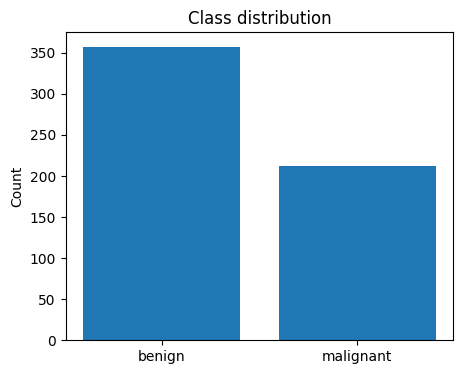

In [4]:
counts = df["target_name"].value_counts()
print(counts)

plt.figure(figsize=(5,4))
plt.bar(counts.index, counts.values)
plt.title("Class distribution")
plt.ylabel("Count")
plt.show()

is dataset imbalanced or not?

# Feature distributions (2–3 key features)

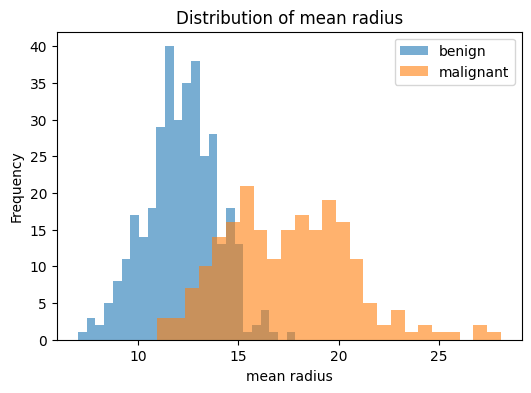

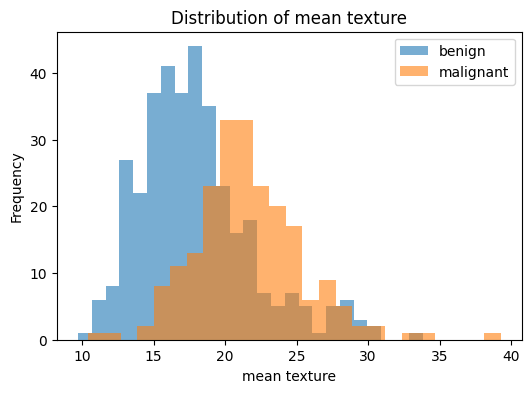

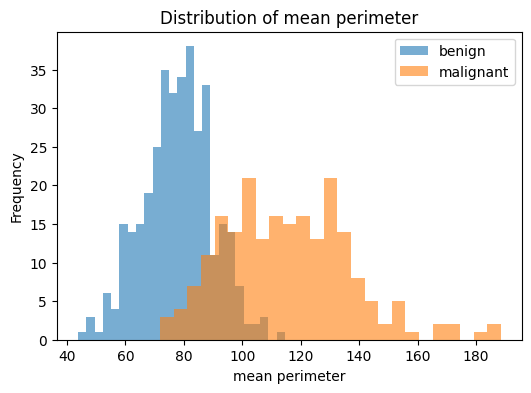

In [5]:
features = ["mean radius", "mean texture", "mean perimeter"]

for f in features:
    plt.figure(figsize=(6,4))
    plt.hist(df[df["target_name"]=="benign"][f], bins=25, alpha=0.6, label="benign")
    plt.hist(df[df["target_name"]=="malignant"][f], bins=25, alpha=0.6, label="malignant")
    plt.title(f"Distribution of {f}")
    plt.xlabel(f)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

Which class tends to have higher values?

# Boxplots (separation visualization)

/tmp/ipython-input-567/3710774543.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=["benign", "malignant"])


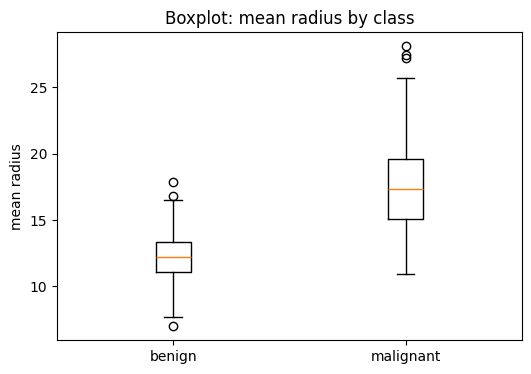

/tmp/ipython-input-567/3710774543.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=["benign", "malignant"])


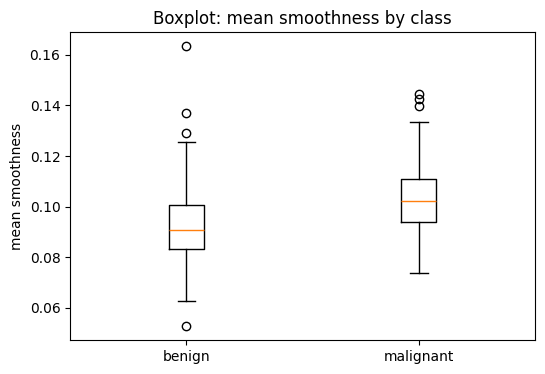

/tmp/ipython-input-567/3710774543.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=["benign", "malignant"])


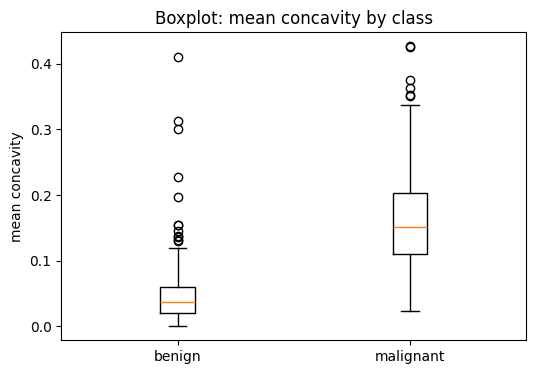

In [6]:
selected = ["mean radius", "mean smoothness", "mean concavity"]

for f in selected:
    plt.figure(figsize=(6,4))
    data_to_plot = [df[df["target_name"]=="benign"][f], df[df["target_name"]=="malignant"][f]]
    plt.boxplot(data_to_plot, labels=["benign", "malignant"])
    plt.title(f"Boxplot: {f} by class")
    plt.ylabel(f)
    plt.show()

identify the features that separate best.

# Correlation heatmap

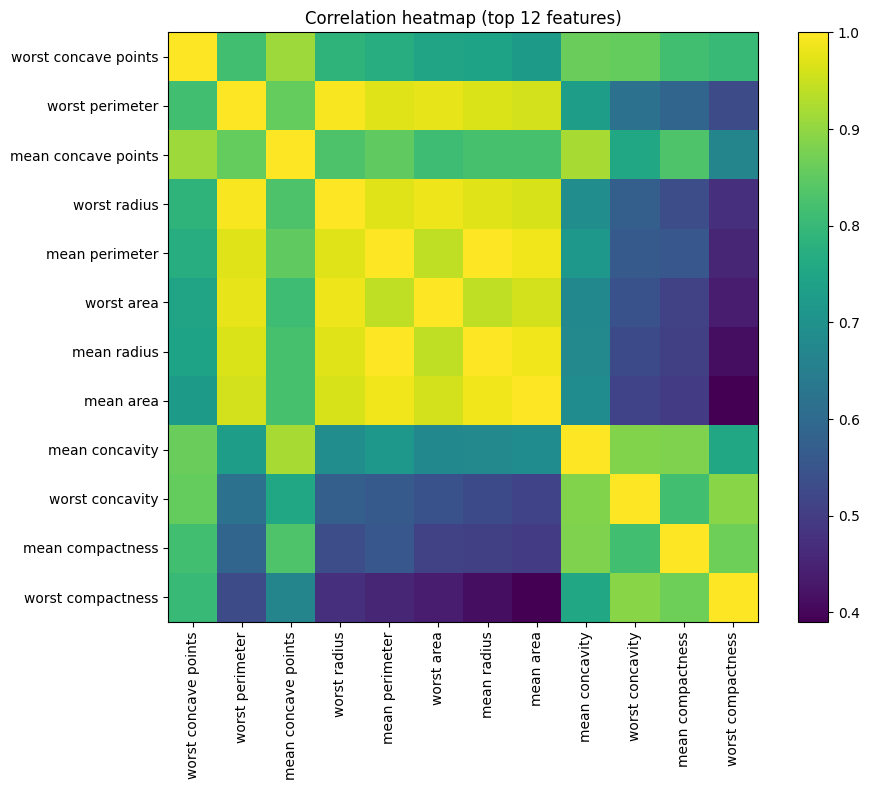

Top correlated features with target:


,target
worst concave points,0.793566
worst perimeter,0.782914
mean concave points,0.776614
worst radius,0.776454
mean perimeter,0.742636
worst area,0.733825
mean radius,0.730029
mean area,0.708984
mean concavity,0.696360
worst concavity,0.659610


In [7]:
corr = df.drop(columns=["target_name"]).corr()

# pick 12 features with highest correlation to target (absolute)
target_corr = corr["target"].drop("target").abs().sort_values(ascending=False)
top_feats = target_corr.head(12).index.tolist()

plt.figure(figsize=(10,8))
plt.imshow(df[top_feats].corr(), interpolation="nearest")
plt.title("Correlation heatmap (top 12 features)")
plt.xticks(range(len(top_feats)), top_feats, rotation=90)
plt.yticks(range(len(top_feats)), top_feats)
plt.colorbar()
plt.tight_layout()
plt.show()

print("Top correlated features with target:")
display(target_corr.head(12))

mention “some features are highly correlated → scaling/regularization helps”

# Pair plot alternative (super light): Scatter plots for 2 features

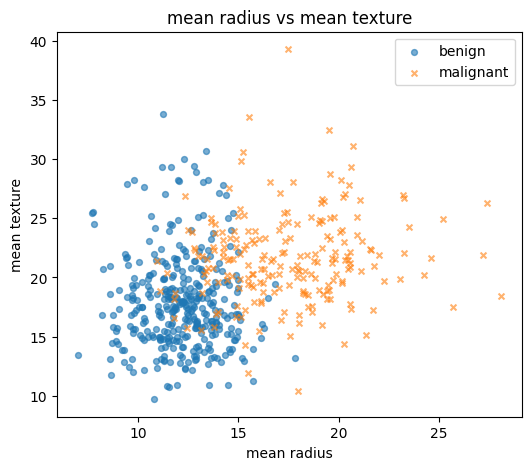

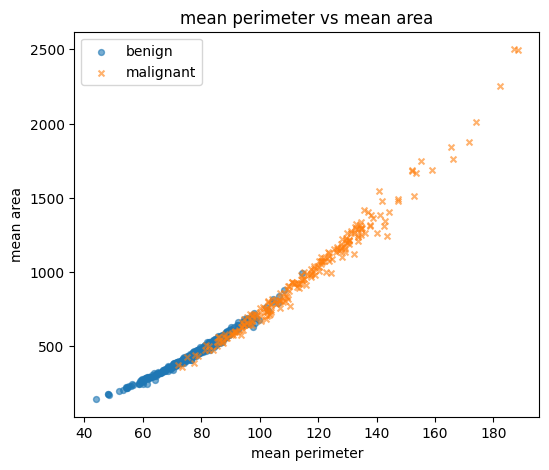

In [8]:
pairs = [("mean radius", "mean texture"), ("mean perimeter", "mean area")]

for x, y in pairs:
    plt.figure(figsize=(6,5))
    for cls, m in [("benign", "o"), ("malignant", "x")]:
        sub = df[df["target_name"]==cls]
        plt.scatter(sub[x], sub[y], s=18, alpha=0.6, label=cls, marker=m)
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

“classes show separability”

# Simple “baseline” feature importance hint (fast, optional but very good)

Top 10 influential features (absolute coefficients):


,0
worst texture,-1.255088
radius error,-1.082965
worst concave points,-0.953686
worst area,-0.947756
worst radius,-0.947616
worst symmetry,-0.939181
area error,-0.929104
worst concavity,-0.823151
worst perimeter,-0.763220
worst smoothness,-0.746625


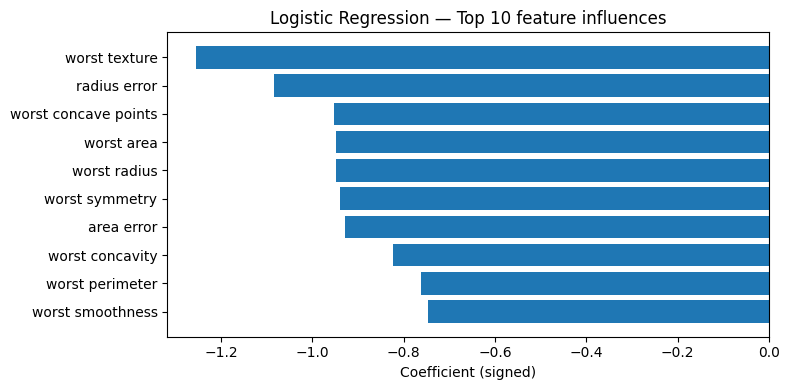

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=["target", "target_name"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_sc, y_train)

coefs = pd.Series(lr.coef_[0], index=X.columns).sort_values(key=np.abs, ascending=False)

print("Top 10 influential features (absolute coefficients):")
display(coefs.head(10))

plt.figure(figsize=(8,4))
plt.barh(coefs.head(10).index[::-1], coefs.head(10).values[::-1])
plt.title("Logistic Regression — Top 10 feature influences")
plt.xlabel("Coefficient (signed)")
plt.tight_layout()
plt.show()

- Dataset size: 569 rows, 30 features

- No missing values

- Class distribution benign vs malignant

- Features like mean radius/perimeter/concavity separate classes well

- Several features highly correlated → risk of multicollinearity

- Scaling recommended

- ANN + regularization should work well

- Model will likely achieve high accuracy